In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import time
import ccxt
%matplotlib inline

In [2]:
import seaborn as sns

In [3]:
from matplotlib import rcParams
import matplotlib.pyplot as plt
        
rcParams['figure.figsize'] = 18,6

In [4]:
RECENT_DAYS = 10

END_DT = dt.datetime.now().date()
END_DT_TS = int(END_DT.strftime('%s')) * 1000

START_DT = END_DT - dt.timedelta(days=RECENT_DAYS)
START_DT_TS = int(START_DT.strftime('%s')) * 1000


In [5]:
def process_trades(dd):
    trades = [{
        'timestamp': d['timestamp'],
        'vol': d['amount'],
        'tid': d['id']
    } for d in dd]
    ftime = trades[0]['timestamp']
    ltime = trades[-1]['timestamp']
    return ftime, ltime, trades

def to_datetime(ts):
    return dt.datetime.fromtimestamp(int(ts) // 1000)

def read_trades(api, symbol, lag=100, limit=1000):
    api.load_markets()
    
    trades = api.fetch_trades(symbol=symbol, since=START_DT_TS, limit=limit)
    ftime, ltime, trades = process_trades(trades)
    all_trades = trades

    print(*map(to_datetime, [ftime, ltime]))
    while ltime < END_DT_TS:
        time.sleep(2.)
        trades = api.fetch_trades(symbol=symbol, since=ltime - lag, limit=limit)
        ftime, ltime, trades = process_trades(trades)
        print(*map(to_datetime, [ftime, ltime]))

        all_trades.extend(trades)

    res = pd.DataFrame(all_trades)
    res['delay_ms'] = (res['timestamp'] - res['timestamp'].shift(1))
    return res

In [6]:
df_hitbtc_lsk_btc = read_trades(ccxt.hitbtc2(), 'LSK/BTC')


2018-10-01 00:00:03 2018-10-01 07:43:19
2018-10-01 07:43:19 2018-10-01 20:40:54
2018-10-01 20:40:54 2018-10-02 05:13:09
2018-10-02 05:13:09 2018-10-02 12:35:22
2018-10-02 12:35:22 2018-10-02 19:28:02
2018-10-02 19:28:02 2018-10-03 03:03:30
2018-10-03 03:03:30 2018-10-03 13:38:26
2018-10-03 13:38:26 2018-10-03 21:56:37
2018-10-03 21:56:37 2018-10-04 05:35:33
2018-10-04 05:35:33 2018-10-04 12:45:09
2018-10-04 12:45:09 2018-10-04 18:57:25
2018-10-04 18:57:25 2018-10-05 01:48:09
2018-10-05 01:48:09 2018-10-05 10:28:13
2018-10-05 10:28:13 2018-10-05 17:10:08
2018-10-05 17:10:08 2018-10-06 00:00:16
2018-10-06 00:00:16 2018-10-06 08:48:41
2018-10-06 08:48:41 2018-10-06 15:26:50
2018-10-06 15:26:50 2018-10-06 23:34:36
2018-10-06 23:34:36 2018-10-07 07:35:23
2018-10-07 07:35:23 2018-10-07 17:31:52
2018-10-07 17:31:52 2018-10-08 02:34:21
2018-10-08 02:34:21 2018-10-08 08:21:45
2018-10-08 08:21:45 2018-10-08 16:53:15
2018-10-08 16:53:15 2018-10-09 00:33:20
2018-10-09 00:33:20 2018-10-09 07:01:51


In [7]:
df_hitbtc_bch_usd = read_trades(ccxt.hitbtc2(), 'BCH/USDT')
df_hitbtc_xrp_usd = read_trades(ccxt.hitbtc2(), 'XRP/USDT')
df_hitbtc_btc_usd = read_trades(ccxt.hitbtc2(), 'BTC/USDT')


2018-10-01 00:00:28 2018-10-01 03:20:25
2018-10-01 03:20:25 2018-10-01 08:54:44
2018-10-01 08:54:44 2018-10-01 15:17:13
2018-10-01 15:17:13 2018-10-01 20:07:50
2018-10-01 20:07:50 2018-10-02 01:14:31
2018-10-02 01:14:31 2018-10-02 05:53:24
2018-10-02 05:53:24 2018-10-02 11:41:31
2018-10-02 11:41:31 2018-10-02 17:26:23
2018-10-02 17:26:23 2018-10-02 22:05:38
2018-10-02 22:05:38 2018-10-03 04:07:19
2018-10-03 04:07:19 2018-10-03 07:58:04
2018-10-03 07:58:04 2018-10-03 13:40:34
2018-10-03 13:40:34 2018-10-03 19:33:07
2018-10-03 19:33:07 2018-10-03 23:27:39
2018-10-03 23:27:39 2018-10-04 02:59:16
2018-10-04 02:59:16 2018-10-04 11:02:47
2018-10-04 11:02:47 2018-10-04 17:47:00
2018-10-04 17:47:00 2018-10-05 00:08:39
2018-10-05 00:08:39 2018-10-05 04:27:51
2018-10-05 04:27:51 2018-10-05 10:13:05
2018-10-05 10:13:05 2018-10-05 14:24:35
2018-10-05 14:24:35 2018-10-05 20:08:40
2018-10-05 20:08:40 2018-10-06 01:09:10
2018-10-06 01:09:10 2018-10-06 03:06:54
2018-10-06 03:06:54 2018-10-06 08:46:09


2018-10-06 20:15:02 2018-10-06 23:08:09
2018-10-06 23:08:09 2018-10-07 01:56:02
2018-10-07 01:56:02 2018-10-07 05:28:37
2018-10-07 05:28:37 2018-10-07 09:09:52
2018-10-07 09:09:52 2018-10-07 11:19:57
2018-10-07 11:19:57 2018-10-07 14:47:12
2018-10-07 14:47:12 2018-10-07 18:08:44
2018-10-07 18:08:44 2018-10-07 22:19:36
2018-10-07 22:19:36 2018-10-08 02:31:28
2018-10-08 02:31:28 2018-10-08 03:35:52
2018-10-08 03:35:52 2018-10-08 06:38:45
2018-10-08 06:38:45 2018-10-08 10:22:59
2018-10-08 10:22:59 2018-10-08 12:38:51
2018-10-08 12:38:51 2018-10-08 14:02:53
2018-10-08 14:02:53 2018-10-08 15:13:16
2018-10-08 15:13:16 2018-10-08 15:39:18
2018-10-08 15:39:18 2018-10-08 16:03:50
2018-10-08 16:03:50 2018-10-08 17:33:47
2018-10-08 17:33:47 2018-10-08 19:33:03
2018-10-08 19:33:03 2018-10-08 22:33:19
2018-10-08 22:33:19 2018-10-09 01:25:50
2018-10-09 01:25:50 2018-10-09 04:47:51
2018-10-09 04:47:51 2018-10-09 08:44:05
2018-10-09 08:44:05 2018-10-09 11:31:28
2018-10-09 11:31:28 2018-10-09 14:24:22


In [8]:
df_binance_bch_btc = read_trades(ccxt.binance(), 'BCH/BTC', lag=10000, limit = 100000)

2018-10-01 00:00:01 2018-10-01 00:59:59
2018-10-01 00:59:53 2018-10-01 01:59:42
2018-10-01 01:59:42 2018-10-01 02:59:32
2018-10-01 02:59:22 2018-10-01 03:59:18
2018-10-01 03:59:18 2018-10-01 04:58:49
2018-10-01 04:58:46 2018-10-01 05:58:38
2018-10-01 05:58:32 2018-10-01 06:58:28
2018-10-01 06:58:20 2018-10-01 07:58:13
2018-10-01 07:58:13 2018-10-01 08:57:38
2018-10-01 08:57:38 2018-10-01 09:57:24
2018-10-01 09:57:20 2018-10-01 10:57:13
2018-10-01 10:57:03 2018-10-01 11:56:40
2018-10-01 11:56:35 2018-10-01 12:56:13
2018-10-01 12:56:12 2018-10-01 13:56:02
2018-10-01 13:56:01 2018-10-01 14:55:44
2018-10-01 14:55:44 2018-10-01 15:55:31
2018-10-01 15:55:22 2018-10-01 16:55:20
2018-10-01 16:55:16 2018-10-01 17:55:02
2018-10-01 17:54:55 2018-10-01 18:54:50
2018-10-01 18:54:48 2018-10-01 19:54:38
2018-10-01 19:54:38 2018-10-01 20:54:16
2018-10-01 20:54:16 2018-10-01 21:54:01
2018-10-01 21:54:01 2018-10-01 22:53:50
2018-10-01 22:53:48 2018-10-01 23:53:11
2018-10-01 23:53:02 2018-10-02 00:52:54


2018-10-09 12:01:12 2018-10-09 13:01:02
2018-10-09 13:00:58 2018-10-09 14:00:47
2018-10-09 14:00:47 2018-10-09 15:00:35
2018-10-09 15:00:28 2018-10-09 16:00:13
2018-10-09 16:00:03 2018-10-09 17:00:01
2018-10-09 17:00:01 2018-10-09 17:59:35
2018-10-09 17:59:33 2018-10-09 18:59:14
2018-10-09 18:59:11 2018-10-09 19:59:00
2018-10-09 19:58:58 2018-10-09 20:58:43
2018-10-09 20:58:43 2018-10-09 21:58:33
2018-10-09 21:58:33 2018-10-09 22:58:17
2018-10-09 22:58:14 2018-10-09 23:57:53
2018-10-09 23:57:48 2018-10-10 00:57:43
2018-10-10 00:57:34 2018-10-10 01:57:30
2018-10-10 01:57:25 2018-10-10 02:57:19
2018-10-10 02:57:11 2018-10-10 03:57:09
2018-10-10 03:57:08 2018-10-10 04:56:46
2018-10-10 04:56:46 2018-10-10 05:56:19
2018-10-10 05:56:12 2018-10-10 06:56:04
2018-10-10 06:56:00 2018-10-10 07:55:48
2018-10-10 07:55:41 2018-10-10 08:55:37
2018-10-10 08:55:37 2018-10-10 09:55:27
2018-10-10 09:55:24 2018-10-10 10:55:11
2018-10-10 10:55:11 2018-10-10 11:54:53
2018-10-10 11:54:52 2018-10-10 12:54:42


In [9]:
df_binance_lsk_btc = read_trades(ccxt.binance(), 'LSK/BTC', lag=10000, limit = 100000)

2018-10-01 00:00:11 2018-10-01 00:59:30
2018-10-01 00:59:27 2018-10-01 01:57:55
2018-10-01 01:57:55 2018-10-01 02:57:32
2018-10-01 02:57:32 2018-10-01 03:57:13
2018-10-01 03:57:08 2018-10-01 04:56:38
2018-10-01 04:56:38 2018-10-01 05:56:16
2018-10-01 05:56:07 2018-10-01 06:55:06
2018-10-01 06:55:06 2018-10-01 07:54:23
2018-10-01 07:54:23 2018-10-01 08:54:10
2018-10-01 08:54:10 2018-10-01 09:53:32
2018-10-01 09:53:32 2018-10-01 10:53:06
2018-10-01 10:53:06 2018-10-01 11:52:54
2018-10-01 11:52:48 2018-10-01 12:52:36
2018-10-01 12:52:36 2018-10-01 13:51:59
2018-10-01 13:51:56 2018-10-01 14:51:27
2018-10-01 14:51:25 2018-10-01 15:51:00
2018-10-01 15:51:00 2018-10-01 16:50:46
2018-10-01 16:50:40 2018-10-01 17:49:08
2018-10-01 17:49:08 2018-10-01 18:47:40
2018-10-01 18:47:30 2018-10-01 19:47:01
2018-10-01 19:47:01 2018-10-01 20:43:59
2018-10-01 20:43:59 2018-10-01 21:43:45
2018-10-01 21:43:45 2018-10-01 22:43:14
2018-10-01 22:43:14 2018-10-01 23:42:59
2018-10-01 23:42:59 2018-10-02 00:42:28


2018-10-09 09:53:18 2018-10-09 10:52:59
2018-10-09 10:52:59 2018-10-09 11:52:31
2018-10-09 11:52:31 2018-10-09 12:52:20
2018-10-09 12:52:18 2018-10-09 13:49:57
2018-10-09 13:49:56 2018-10-09 14:49:29
2018-10-09 14:49:29 2018-10-09 15:49:17
2018-10-09 15:49:17 2018-10-09 16:47:43
2018-10-09 16:47:36 2018-10-09 17:45:42
2018-10-09 17:45:42 2018-10-09 18:43:06
2018-10-09 18:43:06 2018-10-09 19:41:20
2018-10-09 19:41:19 2018-10-09 20:40:46
2018-10-09 20:40:37 2018-10-09 21:40:11
2018-10-09 21:40:09 2018-10-09 22:39:58
2018-10-09 22:39:48 2018-10-09 23:37:40
2018-10-09 23:37:40 2018-10-10 00:35:44
2018-10-10 00:35:44 2018-10-10 01:33:55
2018-10-10 01:33:53 2018-10-10 02:31:10
2018-10-10 02:31:10 2018-10-10 03:30:55
2018-10-10 03:30:55 2018-10-10 04:28:24
2018-10-10 04:28:24 2018-10-10 05:27:50
2018-10-10 05:27:48 2018-10-10 06:27:38
2018-10-10 06:27:38 2018-10-10 07:27:16
2018-10-10 07:27:10 2018-10-10 08:24:32
2018-10-10 08:24:32 2018-10-10 09:24:08
2018-10-10 09:24:06 2018-10-10 10:22:40


In [10]:
df_binance_xrp_btc= read_trades(ccxt.binance(), 'XRP/BTC', lag=10000, limit = 100000)

2018-10-01 00:00:01 2018-10-01 00:59:58
2018-10-01 00:59:49 2018-10-01 01:59:48
2018-10-01 01:59:40 2018-10-01 02:59:37
2018-10-01 02:59:27 2018-10-01 03:59:24
2018-10-01 03:59:16 2018-10-01 04:59:13
2018-10-01 04:59:04 2018-10-01 05:59:03
2018-10-01 05:58:55 2018-10-01 06:58:53
2018-10-01 06:58:43 2018-10-01 07:58:39
2018-10-01 07:58:29 2018-10-01 08:58:25
2018-10-01 08:58:21 2018-10-01 09:58:09
2018-10-01 09:57:59 2018-10-01 10:57:58
2018-10-01 10:57:50 2018-10-01 11:57:48
2018-10-01 11:57:38 2018-10-01 12:57:38
2018-10-01 12:57:29 2018-10-01 13:57:24
2018-10-01 13:57:14 2018-10-01 14:57:13
2018-10-01 14:57:03 2018-10-01 15:57:02
2018-10-01 15:56:55 2018-10-01 16:56:52
2018-10-01 16:56:43 2018-10-01 17:56:42
2018-10-01 17:56:33 2018-10-01 18:56:28
2018-10-01 18:56:20 2018-10-01 19:56:16
2018-10-01 19:56:10 2018-10-01 20:56:05
2018-10-01 20:55:56 2018-10-01 21:55:55
2018-10-01 21:55:46 2018-10-01 22:55:45
2018-10-01 22:55:35 2018-10-01 23:55:34
2018-10-01 23:55:26 2018-10-02 00:55:24


2018-10-09 12:17:47 2018-10-09 13:17:39
2018-10-09 13:17:32 2018-10-09 14:17:29
2018-10-09 14:17:26 2018-10-09 15:17:19
2018-10-09 15:17:10 2018-10-09 16:17:07
2018-10-09 16:17:01 2018-10-09 17:16:55
2018-10-09 17:16:46 2018-10-09 18:16:45
2018-10-09 18:16:35 2018-10-09 19:16:34
2018-10-09 19:16:26 2018-10-09 20:16:23
2018-10-09 20:16:18 2018-10-09 21:16:11
2018-10-09 21:16:01 2018-10-09 22:15:57
2018-10-09 22:15:48 2018-10-09 23:15:46
2018-10-09 23:15:37 2018-10-10 00:15:35
2018-10-10 00:15:28 2018-10-10 01:15:21
2018-10-10 01:15:13 2018-10-10 02:15:04
2018-10-10 02:14:55 2018-10-10 03:14:44
2018-10-10 03:14:38 2018-10-10 04:14:33
2018-10-10 04:14:27 2018-10-10 05:14:22
2018-10-10 05:14:13 2018-10-10 06:14:11
2018-10-10 06:14:07 2018-10-10 07:14:00
2018-10-10 07:13:51 2018-10-10 08:13:50
2018-10-10 08:13:45 2018-10-10 09:13:34
2018-10-10 09:13:25 2018-10-10 10:13:24
2018-10-10 10:13:14 2018-10-10 11:13:11
2018-10-10 11:13:01 2018-10-10 12:13:00
2018-10-10 12:12:51 2018-10-10 13:12:49


In [11]:
def show_hist(df, low=1000,high=61000,bins=1000):
    ax = df['delay_ms'][(df['delay_ms']>=low)&(df['delay_ms']<=high)].hist(bins=bins)
    ax.margins(x=0)
    plt.show()
    #df['delay_ms'][(df['delay_ms']>=low)&(df['delay_ms']<=high)].hist(bins=bins,figsize=(18,6))
    #ax = sns.distplot(df['delay_ms'][(df['delay_ms']>=low)&(df['delay_ms']<=high)],bins=bins)
    #ax.margins(x=0)
    #plt.show()


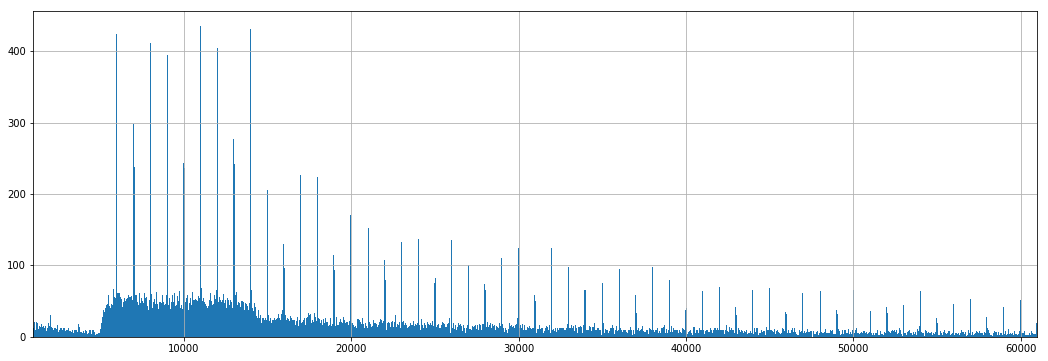

In [12]:
show_hist(df_hitbtc_lsk_btc)

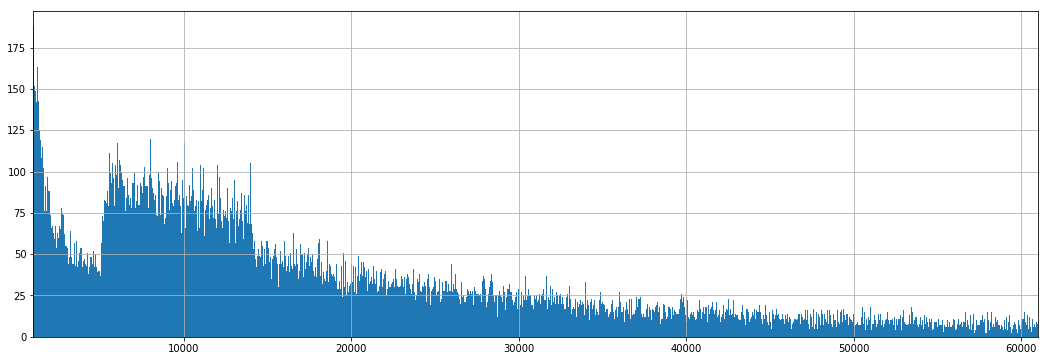

In [13]:
show_hist(df_hitbtc_bch_usd)

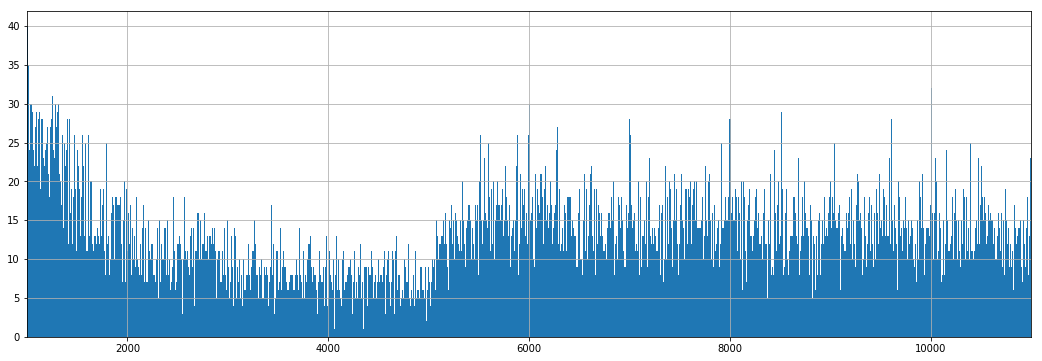

In [14]:
show_hist(df_hitbtc_bch_usd,high=11000)

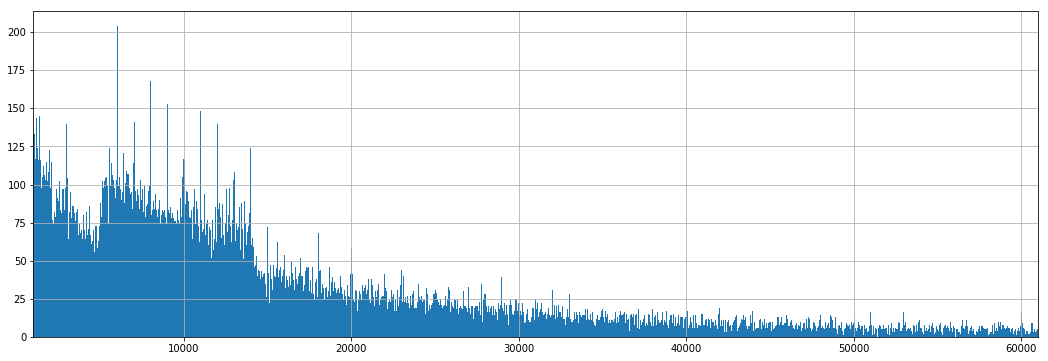

In [15]:
show_hist(df_hitbtc_xrp_usd)

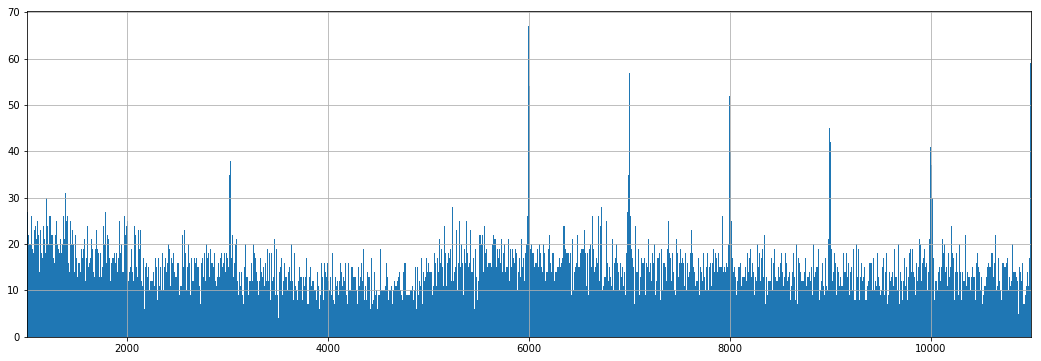

In [16]:
show_hist(df_hitbtc_xrp_usd,high=11000)

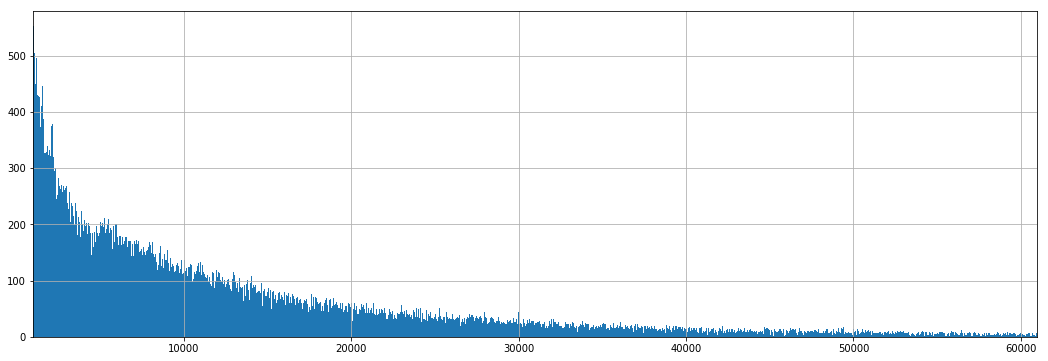

In [30]:
show_hist(df_hitbtc_btc_usd, low=1000)

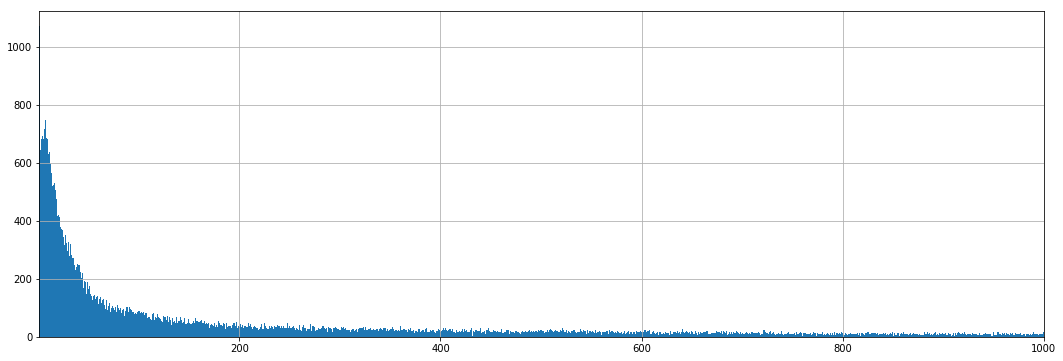

In [18]:
show_hist(df_hitbtc_btc_usd, low=1, high=1000)

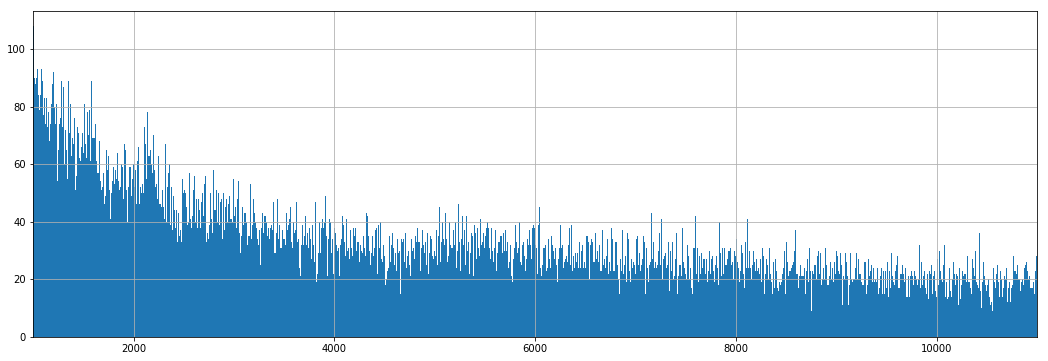

In [19]:
show_hist(df_hitbtc_btc_usd,high=11000)

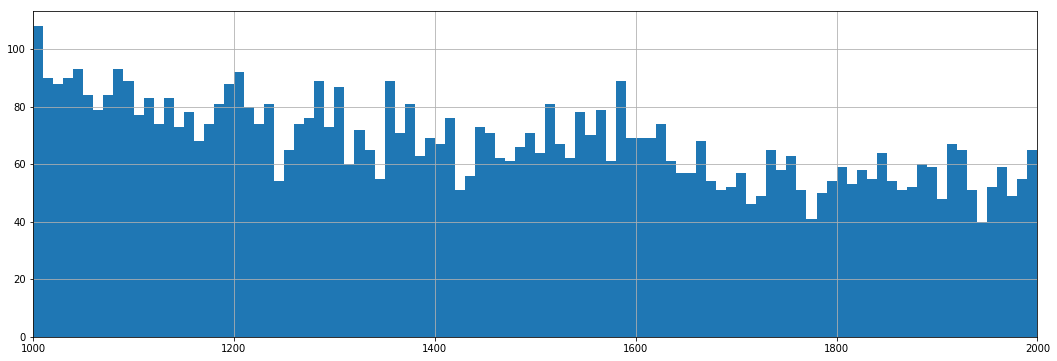

In [20]:
show_hist(df_hitbtc_btc_usd,high=2000,bins=100)

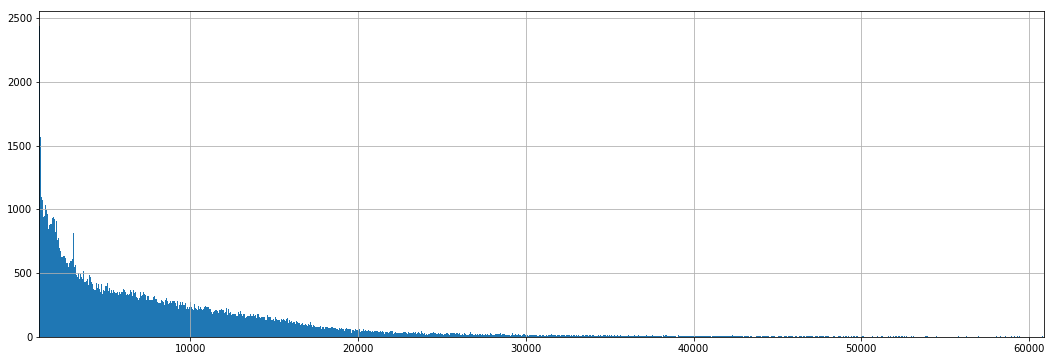

In [21]:
show_hist(df_binance_bch_btc)

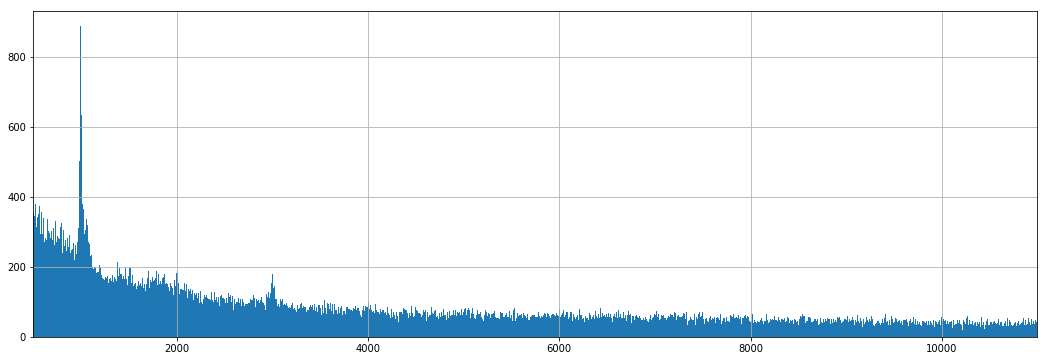

In [22]:
show_hist(df_binance_bch_btc, low=500, high=11000)

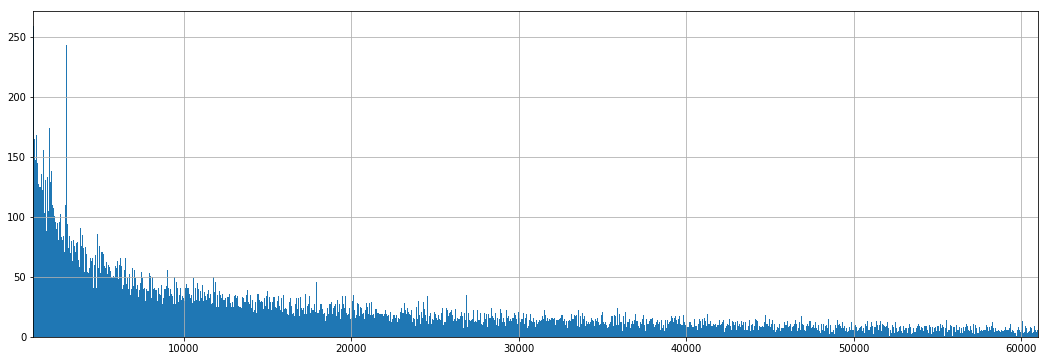

In [23]:
show_hist(df_binance_lsk_btc)

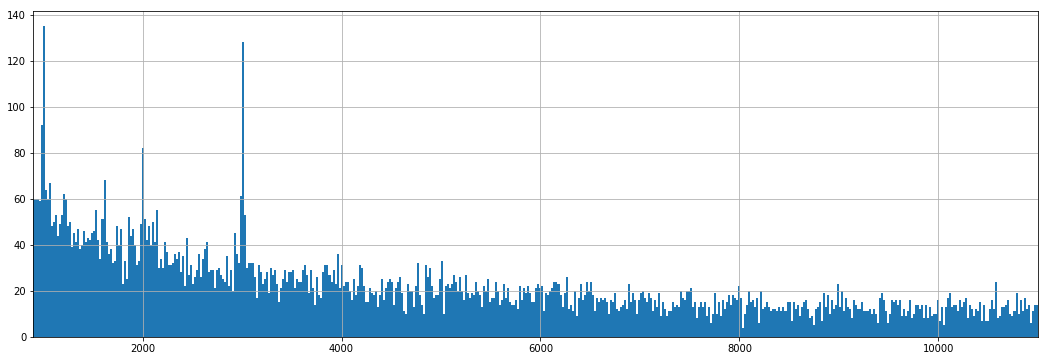

In [24]:
show_hist(df_binance_lsk_btc, low=900, high=11000, bins=500)

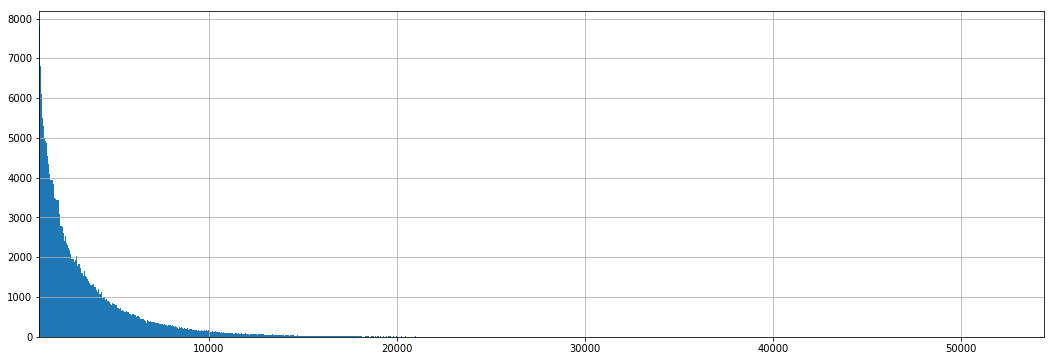

In [25]:
show_hist(df_binance_xrp_btc)

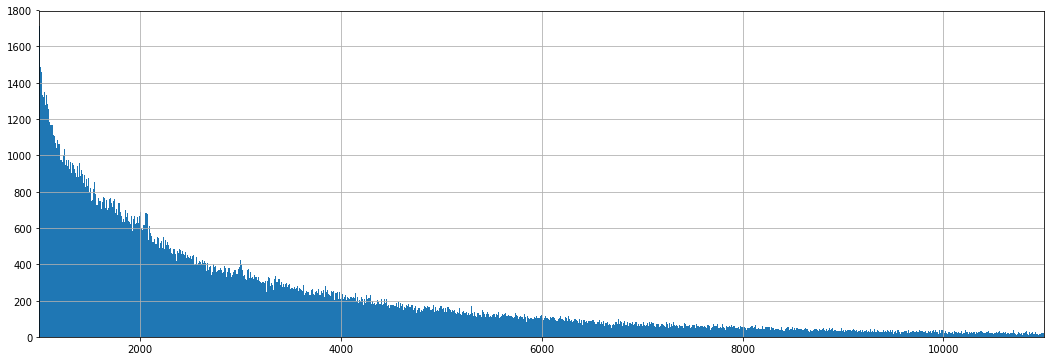

In [26]:
show_hist(df_binance_xrp_btc, high=11000)

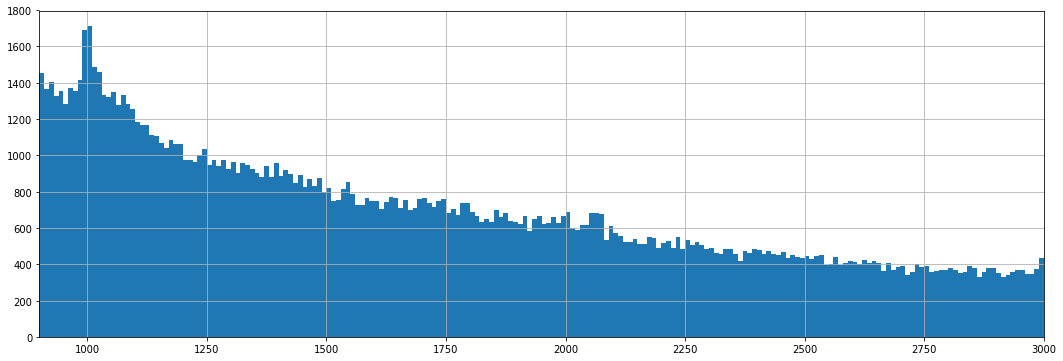

In [27]:
show_hist(df_binance_xrp_btc, low=900, high=3000, bins=210)